# Import Libraries

In [1]:
%load_ext tensorboard
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
print(tf.__version__)


2.0.0


Using TensorFlow backend.


# Import Data 

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

liver_dataframe = pd.read_csv("LiverData.csv", sep=",")


liver_dataframe = liver_dataframe.reindex(
   np.random.permutation(liver_dataframe.index))

In [3]:
liver_dataframe.shape[0]

1385

In [4]:
liver_dataframe.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Class
930,39,Male,28,Present,Present,Absent,Absent,Present,Absent,Absent,...,108,67,58,33,1019551,332115,5,5,5,Cirrhosis
199,54,Female,29,Present,Absent,Present,Present,Absent,Absent,Present,...,106,119,97,34,1190662,14287,556670,771412,100993,Portal Fibrosis
1359,35,Male,23,Present,Absent,Present,Absent,Absent,Absent,Present,...,106,74,75,28,327488,563281,745665,348266,605628,Portal Fibrosis
861,55,Female,33,Present,Absent,Absent,Absent,Present,Absent,Absent,...,69,113,50,45,55781,145136,5,5,5,Many Septa
387,40,Female,32,Absent,Present,Absent,Absent,Present,Absent,Present,...,115,46,53,25,30004,58435,5,5,5,Few Septa


In [5]:
liver_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 930 to 1192
Data columns (total 28 columns):
Age                                 1385 non-null int64
Gender                              1385 non-null object
BMI                                 1385 non-null int64
Fever                               1385 non-null object
Nausea/Vomting                      1385 non-null object
Headache                            1385 non-null object
Diarrhea                            1385 non-null object
Fatigue & generalized bone ache     1385 non-null object
Jaundice                            1385 non-null object
Epigastric pain                     1385 non-null object
WBC                                 1385 non-null int64
RBC                                 1385 non-null int64
HGB                                 1385 non-null int64
Plat                                1385 non-null int64
AST 1                               1385 non-null int64
ALT 1                               1385 no

# Pre-Processing

In [6]:
#Categorical variables
liver_dataframe['Gender'] = (liver_dataframe['Gender'] == 'Male').astype(int)

label = LabelEncoder()
liver_dataframe['Fever'] = label.fit_transform(liver_dataframe['Fever'])
liver_dataframe['Nausea/Vomting'] = label.fit_transform(liver_dataframe['Nausea/Vomting'])
liver_dataframe['Headache '] = label.fit_transform(liver_dataframe['Headache '])
liver_dataframe['Fatigue & generalized bone ache '] = label.fit_transform(liver_dataframe['Fatigue & generalized bone ache '])
liver_dataframe['Diarrhea '] = label.fit_transform(liver_dataframe['Diarrhea '])
liver_dataframe['Jaundice '] = label.fit_transform(liver_dataframe['Jaundice '])
liver_dataframe['Epigastric pain '] = label.fit_transform(liver_dataframe['Epigastric pain '])
liver_dataframe['Class'] = label.fit_transform(liver_dataframe['Class'])

liver_dataframe

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Class
930,39,1,28,1,1,0,0,1,0,0,...,108,67,58,33,1019551,332115,5,5,5,0
199,54,0,29,1,0,1,1,0,0,1,...,106,119,97,34,1190662,14287,556670,771412,100993,3
1359,35,1,23,1,0,1,0,0,0,1,...,106,74,75,28,327488,563281,745665,348266,605628,3
861,55,0,33,1,0,0,0,1,0,0,...,69,113,50,45,55781,145136,5,5,5,2
387,40,0,32,0,1,0,0,1,0,1,...,115,46,53,25,30004,58435,5,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,39,0,35,0,0,1,0,1,0,1,...,65,123,39,26,716366,621482,146093,427928,194148,3
299,47,0,28,0,0,1,1,0,0,0,...,81,85,127,28,252529,312170,147415,419945,530547,1
493,58,0,25,1,0,1,0,1,0,1,...,118,92,106,39,706673,94578,307646,399840,2549,2
527,52,0,25,1,0,0,1,0,0,0,...,126,120,40,22,72430,65625,273892,238775,523908,3


In [7]:
liver_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 930 to 1192
Data columns (total 28 columns):
Age                                 1385 non-null int64
Gender                              1385 non-null int64
BMI                                 1385 non-null int64
Fever                               1385 non-null int64
Nausea/Vomting                      1385 non-null int64
Headache                            1385 non-null int64
Diarrhea                            1385 non-null int64
Fatigue & generalized bone ache     1385 non-null int64
Jaundice                            1385 non-null int64
Epigastric pain                     1385 non-null int64
WBC                                 1385 non-null int64
RBC                                 1385 non-null int64
HGB                                 1385 non-null int64
Plat                                1385 non-null int64
AST 1                               1385 non-null int64
ALT 1                               1385 non-null i

# Baseline

In [8]:
class_dist = 100*liver_dataframe['Class'].value_counts()/len(liver_dataframe)
class_dist

0   26.1
2   25.6
3   24.3
1   24.0
Name: Class, dtype: float64

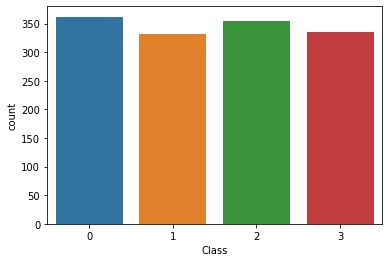

In [9]:
sns.countplot(x='Class',data=liver_dataframe)

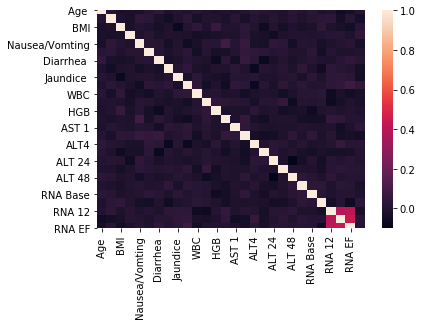

In [10]:
sns.heatmap(liver_dataframe.corr())

In [11]:
def preprocess_features(liver_dataframe):
    
    selected_features = liver_dataframe[
    ["Age ", "Gender", "BMI", "Fever", "Nausea/Vomting", "Headache ",
     "Diarrhea ", "Fatigue & generalized bone ache ","Jaundice ","Epigastric pain ",
     "WBC","RBC","Plat","AST 1","ALT 1","ALT4","ALT 12","ALT 24","ALT 36","ALT 48","ALT after 24 w",
    "RNA Base","RNA 4","RNA 12","RNA EOT","RNA EF"]]

    processed_features = selected_features.copy()
    return processed_features

def preprocess_targets(liver_dataframe):
    output_targets = liver_dataframe["Class"]
    return output_targets
  
  

# Train/Validation Split

In [86]:
# Choose the first 83 examples for training.
training_examples = preprocess_features(liver_dataframe.head(1085))
training_targets = preprocess_targets(liver_dataframe.head(1085))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose the 20 examples for validation.
validation_examples = preprocess_features(liver_dataframe.tail(300))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(liver_dataframe.tail(300))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


Training examples summary:


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
count,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,...,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0,1085.0
mean,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.6,-1.0,-1.6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.7,-1.7,-2.9,-3.0,-4.0,-1.7,-1.7,-1.0,-1.1,-1.1
25%,-0.8,-1.0,-0.9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.9,-0.9,-0.9,-0.8,-0.8,-0.9,-0.9,-1.0,-1.1,-1.1
50%,-0.0,1.0,0.1,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,0.0,-0.0,0.0,-0.0,0.1,0.0,-0.0,-0.2,-0.2,-0.2
75%,0.9,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.9,0.9,0.8,0.9,0.9,0.9,0.8,0.8,0.9,0.9
max,1.7,1.0,1.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.7,1.7,1.7,1.7,1.6,1.7,1.7,11.8,2.0,1.9


Validation examples summary:


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
count,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
mean,-0.0,0.1,0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.1,-0.0,-0.0,0.0,-0.1,-0.1,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.1,1.0,1.0,1.0,0.9,1.0,1.0
min,-1.6,-1.0,-1.6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.7,-1.7,-1.6,-1.7,-1.6,-1.7,-1.7,-1.0,-1.1,-1.1
25%,-0.9,-1.0,-0.9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.8,-0.8,-0.7,-1.0,-0.9,-0.8,-1.0,-1.0,-1.1,-1.1
50%,0.1,1.0,0.1,1.0,-0.0,-1.0,-0.0,-1.0,-1.0,1.0,...,0.0,-0.0,0.1,-0.0,-0.1,0.0,-0.1,-0.3,-0.1,-0.2
75%,0.8,1.0,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.8,0.9,0.9,0.9,0.9,0.8,0.8,0.7,0.7,0.7
max,1.7,1.0,1.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.7,1.7,1.7,1.7,1.6,1.7,1.7,1.7,2.0,1.9


Training targets summary:


count   1085.0
mean       1.5
std        1.1
min        0.0
25%        0.0
50%        2.0
75%        2.0
max        3.0
Name: Class, dtype: float64

Validation targets summary:


count   300.0
mean      1.5
std       1.1
min       0.0
25%       1.0
50%       1.0
75%       2.0
max       3.0
Name: Class, dtype: float64

# Build Model

In [87]:
training_examples.shape[1]

26

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [157]:

from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Dense, Activation, Dropout


baseline_model = keras.Sequential([
        
        keras.layers.Dense(30, activation = tf.nn.relu, input_shape = (training_examples.shape[1],)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(15, activation=tf.nn.relu,),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(4, activation='softmax')
    ])

baseline_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="adam",
                metrics=['sparse_categorical_accuracy'])

baseline_model.summary()




Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 30)                810       
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_9 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 64        
Total params: 1,339
Trainable params: 1,339
Non-trainable params: 0
_________________________________________________________________


# Fit Model

In [159]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)
EPOCHS = 300
b_history = baseline_model.fit(training_examples,training_targets,epochs=EPOCHS,
                   validation_data= (validation_examples, validation_targets),verbose=2,
                               callbacks=[early_stopping_monitor])



Train on 1085 samples, validate on 300 samples
Epoch 1/300
1085/1085 - 0s - loss: 1.3887 - sparse_categorical_accuracy: 0.3014 - val_loss: 1.3998 - val_sparse_categorical_accuracy: 0.2933
Epoch 2/300
1085/1085 - 0s - loss: 1.3653 - sparse_categorical_accuracy: 0.3189 - val_loss: 1.3997 - val_sparse_categorical_accuracy: 0.2833
Epoch 3/300
1085/1085 - 0s - loss: 1.3788 - sparse_categorical_accuracy: 0.3088 - val_loss: 1.4021 - val_sparse_categorical_accuracy: 0.3067
Epoch 4/300
1085/1085 - 0s - loss: 1.3638 - sparse_categorical_accuracy: 0.3161 - val_loss: 1.4002 - val_sparse_categorical_accuracy: 0.3067
Epoch 5/300
1085/1085 - 0s - loss: 1.3738 - sparse_categorical_accuracy: 0.3005 - val_loss: 1.4019 - val_sparse_categorical_accuracy: 0.3133


In [160]:
losses_df = pd.DataFrame(b_history.history)
losses_df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,1.4,0.3,1.4,0.3
1,1.4,0.3,1.4,0.3
2,1.4,0.3,1.4,0.3
3,1.4,0.3,1.4,0.3
4,1.4,0.3,1.4,0.3


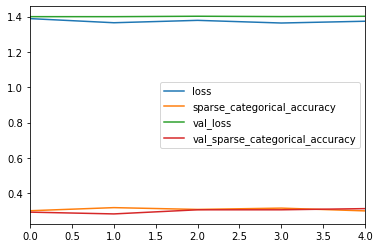

In [161]:
losses_df.plot()

In [162]:
print("Training examples summary:")
print(max(b_history.history['sparse_categorical_accuracy']))
print("Testing examples summary:")
print(max(b_history.history['val_sparse_categorical_accuracy']))

Training examples summary:
0.318894
Testing examples summary:
0.31333333


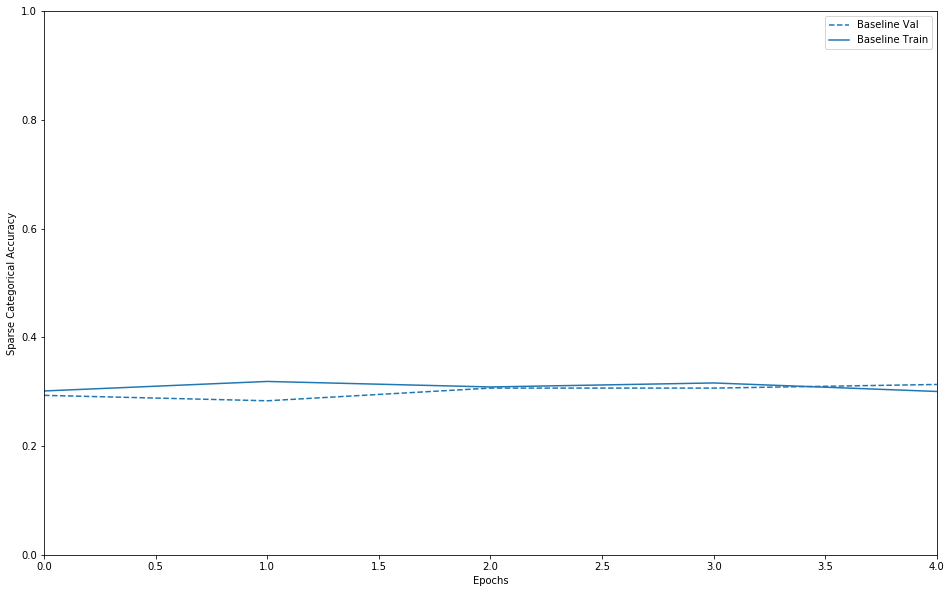

In [163]:
import matplotlib.pyplot as plt


def plot_history(histories, key='sparse_categorical_accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history)])


In [164]:
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
predictions = baseline_model.predict_classes(validation_examples)

In [166]:
print(classification_report(validation_targets,predictions))

              precision    recall  f1-score   support

           0       0.37      0.58      0.45        71
           1       0.40      0.11      0.17        90
           2       0.27      0.51      0.35        65
           3       0.24      0.14      0.17        74

    accuracy                           0.31       300
   macro avg       0.32      0.33      0.29       300
weighted avg       0.33      0.31      0.28       300

